In [1]:
import numpy as np
from autograd import jacobian  #jf= jacobian(f)  
from typing import Tuple, List, Callable
#hacer el jacobiano de una funcion -> gradiente
#hacer el jacobiano del gradiente -> matriz hessiana
import numpy as np
from scipy.optimize import minimize_scalar

def f_ellipse(x: np.ndarray)-> float:
    return x[0]**2+12*x[1]**2

def g_ellipse(x: np.ndarray)-> np.ndarray:
    return np.array((2*x[0],24*x[1]))

def f_rosen(x: np.ndarray)-> float:
    return (1-x[0])**2+100*(x[1]-x[0]**2)**2

def g_rosen(x: np.ndarray)-> np.ndarray:
    return np.array((2*(1-x[0])+200*(x[1]-x[0]**2)*(-2*x[0]),200*(x[1]-x[0]**2)))

def grad_desc(x: np.array, f: callable, gf: callable, lr_ini=0.01, lr_decr=0.999, maxiter=100, tol=0.001)-> Tuple[np.ndarray, List[np.ndarray], int]:
    n_iter = 0
    evolucion_x=[x]
    while np.linalg.norm(gf(x)) > tol and n_iter < maxiter:
        x = x - lr_ini*gf(x)
        evolucion_x.append(x)
        lr_ini *= lr_decr
        n_iter += 1
    
    return (np.array(x, f(x)), evolucion_x, n_iter)

a=np.array([0.0513,0.0347]) 
b = np.array([1,0])
        
#print(grad_desc(a,f_ellipse,g_ellipse))


def f_md(f: Callable, x: np.array, gx: np.array)-> Callable:
    # gx gradiente de f en x.
    def f_1d(t: float)-> float:
        return f(x - t*gx)
    return f_1d


def grad_desc_ls(x: np.array, f: Callable, gf: Callable, maxiter=100, tol=0.001, method ='brent')-> Tuple[np.ndarray, List [np.array], int]:
    n_iter = 0
    evolucion_x=[x]
    opt = {'maxiter': maxiter}
    while np.linalg.norm(gf(x)) > tol and n_iter < maxiter:
        mu = minimize_scalar(f_md(f, x, gf(x)),method=method, tol=0.001, options = opt)['x']
        #print(mu['x'])
        x = x - mu*gf(x)
        evolucion_x.append(x)
        n_iter += 1
    
    return (np.array(x, f(x)), evolucion_x, n_iter)

c=np.array([-0.1,0.2])
print(grad_desc(c,f_rosen,g_rosen))


(array([-0.12153359,  0.15289093]), [array([-0.1,  0.2]), array([-0.198, -0.18 ]), array([-0.04850008,  0.25796959]), array([-0.11891888, -0.25224312]), array([-0.01489721,  0.27892981]), array([-0.05165563, -0.27625963]), array([-0.01523858,  0.27881254]), array([-0.05230088, -0.27501349]), array([-0.0154995 ,  0.27660741]), array([-0.05264519, -0.27172052]), array([-0.01622478,  0.27234241]), array([-0.05382886, -0.26639876]), array([-0.01732574,  0.26629887]), array([-0.05564393, -0.25934953]), array([-0.01882477,  0.25875923]), array([-0.05810484, -0.25086199]), array([-0.02074202,  0.25004035]), array([-0.06121345, -0.24125199]), array([-0.02310252,  0.2404825 ]), array([-0.0649773 , -0.23084993]), array([-0.02592887,  0.23044123]), array([-0.06939943, -0.21999265]), array([-0.0292338 ,  0.22027706]), array([-0.07446995, -0.20901395]), array([-0.03301143,  0.21034356]), array([-0.08015696, -0.19823453]), array([-0.03722782,  0.20097368]), array([-0.08639741, -0.187952  ]), array([

In [2]:
def h_rosen(x: np.ndarray)-> np.ndarray:
    return np.array([[2+800*x[0]-400*x[1], -400*x[0]],[-400*x[0], 200]])
    #h=jacobian(jacobian(f_rosen)) ; return h(x)

def newton(x: np.array, f: Callable, gf: Callable, hf: Callable, lr=0.01, lr_decr=0.999, maxiter=100, tol=0.001)-> Tuple[np.ndarray, List[np.array], int]:
    n_iter = 0
    evolucion_x=[x]
    gradiente = gf(x)
    while np.linalg.norm(gradiente) > tol and n_iter < maxiter:
        hessiano = hf(x)
        #print(hessiano)
        # Calcula la inversa del hessiano.
        inversa_hessiano = np.linalg.inv(hessiano)

        x = x - lr*(np.dot(inversa_hessiano, gradiente))
        evolucion_x.append(x)
        lr *= lr_decr
        n_iter += 1
        gradiente = gf(x)  #linea innecesaria

    return (np.array(x, f(x)), evolucion_x, n_iter)

def newton_ls(x: np.array, f: Callable, gf: Callable, hf: Callable, maxiter=100, tol=0.001, method ='brent')-> Tuple[np.ndarray , List[np.array], int]:
    n_iter = 0
    evolucion_x=[x]
    gradiente = gf(x)
    opt = {'maxiter': maxiter}
    while np.linalg.norm(gradiente) > tol and n_iter < maxiter:
        # Calcula la inversa del hessiano.
        inversa_hessiano = np.linalg.inv(hf(x))
        mu = minimize_scalar(f_md(f, x, gf(x)),method=method, tol=0.001, options = opt)['x']
        x = x - np.dot(mu*inversa_hessiano, gradiente) 
        evolucion_x.append(x)
        n_iter += 1
        gradiente = gf(x)

    return (np.array(x, f(x)), evolucion_x, n_iter)

b = np.array([1.1,0.9])
print(newton(b,f_rosen,g_rosen, h_rosen))
print(newton_ls(b,f_rosen,g_rosen, h_rosen))

(array([1.09961091, 1.0900483 ]), [array([1.1, 0.9]), array([1.09999552, 0.90309013]), array([1.09999105, 0.90614624]), array([1.0999866 , 0.90916871]), array([1.09998216, 0.91215796]), array([1.09997775, 0.91511438]), array([1.09997334, 0.91803835]), array([1.09996896, 0.92093026]), array([1.09996459, 0.92379049]), array([1.09996024, 0.92661942]), array([1.0999559 , 0.92941741]), array([1.09995157, 0.93218483]), array([1.09994726, 0.93492204]), array([1.09994297, 0.9376294 ]), array([1.09993869, 0.94030725]), array([1.09993442, 0.94295595]), array([1.09993017, 0.94557584]), array([1.09992593, 0.94816726]), array([1.09992171, 0.95073054]), array([1.0999175, 0.953266 ]), array([1.0999133 , 0.95577399]), array([1.09990912, 0.95825481]), array([1.09990495, 0.96070879]), array([1.09990079, 0.96313624]), array([1.09989665, 0.96553747]), array([1.09989252, 0.96791279]), array([1.0998884 , 0.97026249]), array([1.09988429, 0.97258688]), array([1.0998802 , 0.97488626]), array([1.09987612, 0.977

# Cuestiones

C:\Users\34642\AppData\Local\Temp\ipykernel_17372\2752981723.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cMap = plt.cm.get_cmap("bwr",lut=n_colors )


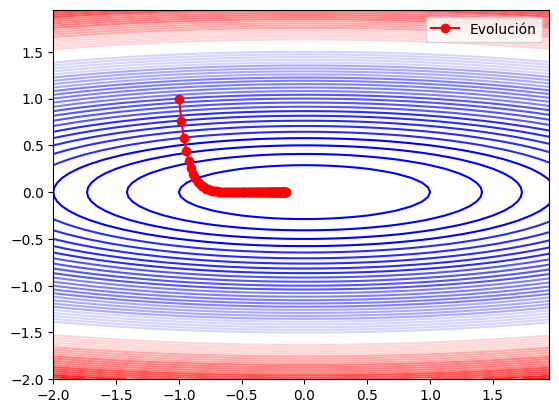

In [4]:
import matplotlib.pyplot as plt
# crear un grid bidimensional
x = np.arange(-2., 2., 0.05)
y = np.arange(-2., 2., 0.05)
yy = np.meshgrid(x, y)
#evaluar ff en el grid
h = f_ellipse(yy)
#dibujar las curvas de nivel
n_colors = 13
cMap = plt.cm.get_cmap("bwr",lut=n_colors )
_ = plt.contour(x, y, h, levels=range(60), cmap=cMap)

punto_inicial = np.array([-1,1])
_, evolucion, _ = grad_desc(punto_inicial, f_ellipse, g_ellipse) 
evolucion = np.array(evolucion)


plt.plot(evolucion[:, 0], evolucion[:, 1], marker='o', color='red', label='Evolución')
plt.legend()

## Rosen

C:\Users\34642\AppData\Local\Temp\ipykernel_10388\299029827.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cMap = plt.cm.get_cmap("bwr", lut=n_colors)


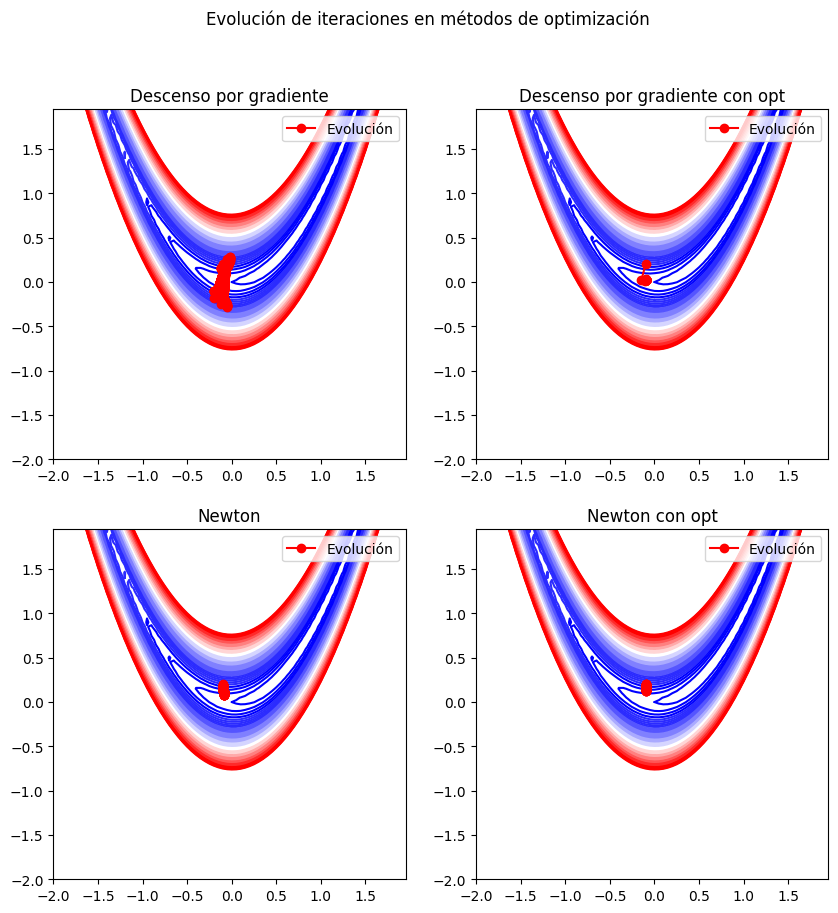

In [ ]:
import matplotlib.pyplot as plt

# Configurar el gráfico
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Evolución de iteraciones en métodos de optimización')

# Métodos de optimización
metodos = ['Descenso por gradiente', 'Descenso por gradiente con opt', 'Newton', 'Newton con opt']
punto_inicial = np.array([-0.1,0.2])
metodos_funciones = [grad_desc, grad_desc_ls, newton, newton_ls]

# Iterar sobre los subgráficos y métodos
for i, ax in enumerate(axes.flatten()):
    metodo = metodos[i]
    punto_inicial = punto_inicial
    metodo_funcion = metodos_funciones[i]

    x = np.arange(-2., 2., 0.05)
    y = np.arange(-2., 2., 0.05)
    yy = np.meshgrid(x, y)

    h = f_rosen(yy)

    # Dibujar las curvas de nivel
    n_colors = 13
    cMap = plt.cm.get_cmap("bwr", lut=n_colors)
    _ = ax.contour(x, y, h, levels=range(60), cmap=cMap)

    if i == 0 or i == 1:
        # Sacas la evolución que va haciendo el punto.
        _, evolucion, _ = metodo_funcion(punto_inicial, f_rosen, g_rosen)
    else:
        _, evolucion, _ = metodo_funcion(punto_inicial, f_rosen, g_rosen, h_rosen)

    evolucion = np.array(evolucion)
    # Dibujar la evolución de las iteraciones
    ax.plot(evolucion[:, 0], evolucion[:, 1], marker='o', color='red', label='Evolución')
    
    ax.set_title(metodo)
    ax.legend()

plt.show()

# Ellipse

C:\Users\34642\AppData\Local\Temp\ipykernel_10388\1276973435.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cMap = plt.cm.get_cmap("bwr", lut=n_colors)


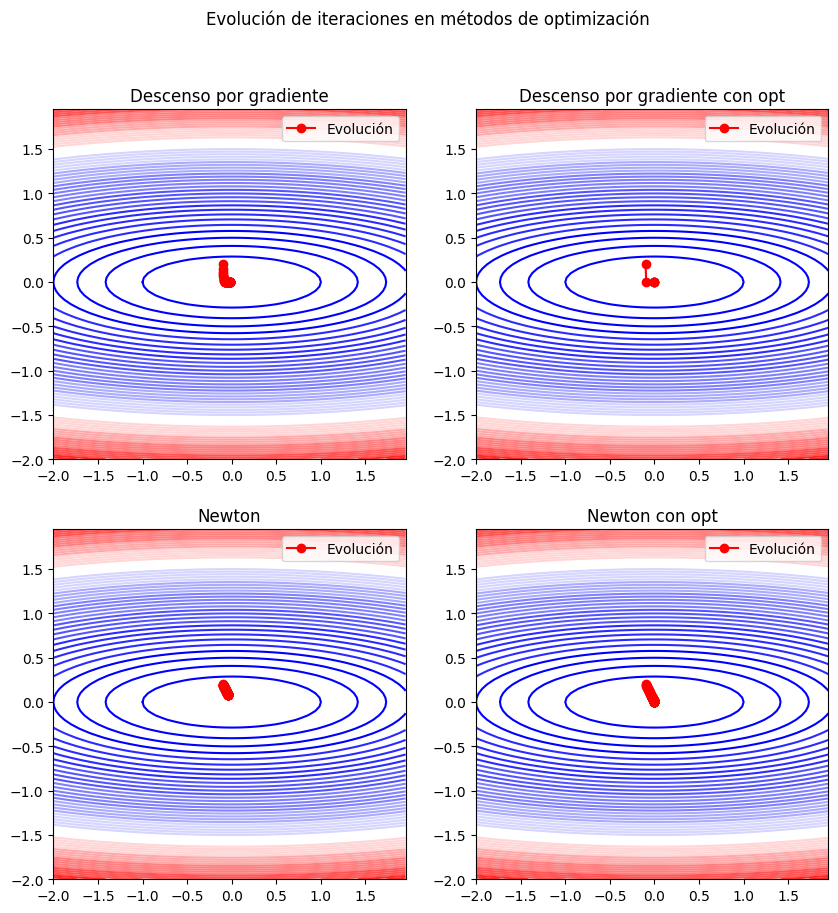

In [ ]:
import matplotlib.pyplot as plt

def h_ellipse(x: np.ndarray)-> np.ndarray:
    return np.array([[2, 0],[0, 24]])

# Configurar el gráfico
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Evolución de iteraciones en métodos de optimización')

# Métodos de optimización
metodos = ['Descenso por gradiente', 'Descenso por gradiente con opt', 'Newton', 'Newton con opt']
punto_inicial = np.array([-0.1,0.2])
metodos_funciones = [grad_desc, grad_desc_ls, newton, newton_ls]

# Iterar sobre los subgráficos y métodos
for i, ax in enumerate(axes.flatten()):
    metodo = metodos[i]
    punto_inicial = punto_inicial
    metodo_funcion = metodos_funciones[i]

    x = np.arange(-2., 2., 0.05)
    y = np.arange(-2., 2., 0.05)
    yy = np.meshgrid(x, y)

    h = f_ellipse(yy)

    # Dibujar las curvas de nivel
    n_colors = 13
    cMap = plt.cm.get_cmap("bwr", lut=n_colors)
    _ = ax.contour(x, y, h, levels=range(60), cmap=cMap)

    if i == 0 or i == 1:
        # Sacas la evolución que va haciendo el punto.
        _, evolucion, _ = metodo_funcion(punto_inicial, f_ellipse, g_ellipse)
    else:
        _, evolucion, _ = metodo_funcion(punto_inicial, f_ellipse, g_ellipse, h_ellipse)

    evolucion = np.array(evolucion)
    # Dibujar la evolución de las iteraciones
    ax.plot(evolucion[:, 0], evolucion[:, 1], marker='o', color='red', label='Evolución')
    
    ax.set_title(metodo)
    ax.legend()

plt.show()


# II-A. Implementando nuestro minimize

In [7]:
#opt = {'gtol': tol}
#hacer el jacobiano de una funcion -> gradiente
#hacer el jacobiano del gradiente -> matriz hessiana
import scipy
from autograd import jacobian

def f_rosen_md(z: np.ndarray)-> float:
    # número de variables tenemos
    n = len(z)
    suma = 0
    for i in range(n-1):
        suma += 100 * (z[i + 1] - z[i]**2)**2 + (1 - z[i])**2

    return suma

l_x = []
def save_x(x: np.ndarray):
    global l_x
    l_x.append(x)

def my_minimize(fun: Callable, callback: Callable, x0: np.ndarray, method= 'BFGS', tol=1.e-4) -> scipy.optimize._optimize.OptimizeResult:
    opt = {'gtol': tol}
    if method != 'BFGS':
        jacobiano = None

    else:
        jacobiano = jacobian(fun)

    return scipy.optimize.minimize(fun, x0, jacobiano, method, options=opt, callback=save_x)

In [ ]:
def f(x):
    return x[0]**2 + np.sin(x[1])

# Calcular la matriz jacobiana de la función
jacobian_f = jacobian(f)

# Punto en el que se evaluará el gradiente
point = np.array([1.0, 0.5])

# Calcular la matriz jacobiana en el punto dado
jacobian_at_point = jacobian_f(point)
# Calcular la matriz jacobiana de los gradientes de la función
jacobian_gradient_f = jacobian(jacobian_at_point) 

# Obtener el gradiente en el punto específico
gradient_at_point = jacobian_at_point[0]  # Tomar la primera fila de la matriz jacobiana

# Calcular la matriz jacobiana en el punto dado
jacobian_at_point = jacobian_gradient_f(point)

# Obtener el hessiano en el punto específico
hessian_at_point = jacobian_at_point[0]  # Tomar la primera fila de la matriz jacobiana de gradientes

print("Gradiente en el punto", point, "es", gradient_at_point)
print("Hessiano en el punto", point, "es\n", hessian_at_point)